In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataApk = pd.read_csv("G:\FileNif\DataMining\diskominfo-od_17142_jml_layanan_aplikasi_umum_aplikasi_khusus__perangkat_d_data.csv")
dataApk.head()

,id,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun
0,1,32,JAWA BARAT,BADAN KEPEGAWAIAN DAERAH,8,ALAMAT WEB,2020
1,2,32,JAWA BARAT,BADAN KESATUAN BANGSA DAN POLITIK,1,ALAMAT WEB,2020
2,3,32,JAWA BARAT,BADAN PENANGGULANGAN BENCANA DAERAH,2,ALAMAT WEB,2020
3,4,32,JAWA BARAT,BADAN PENDAPATAN DAERAH,8,ALAMAT WEB,2020
4,5,32,JAWA BARAT,BADAN PENELITIAN DAN PENGEMBANGAN DAERAH,1,ALAMAT WEB,2020


In [3]:
dataHost = pd.read_csv("G:\FileNif\DataMining\diskominfo-od_18163_jumlah_layanan_hosting_berdasarkan_perangkat_daerah_data.csv")
dataHost.head()

,id,kode_provinsi,nama_provinsi,nama_perangkat_daerah,jumlah_layanan_hosting,satuan,tahun
0,1,32,JAWA BARAT,BADAN KEPEGAWAIAN DAERAH,1,KALI,2020
1,2,32,JAWA BARAT,BADAN KESATUAN BANGSA DAN POLITIK,1,KALI,2020
2,3,32,JAWA BARAT,BADAN PENANGGULANGAN BENCANA DAERAH,3,KALI,2020
3,4,32,JAWA BARAT,BADAN PENDAPATAN DAERAH,0,KALI,2020
4,5,32,JAWA BARAT,BADAN PENELITIAN DAN PENGEMBANGAN DAERAH,2,KALI,2020


In [4]:
dataApk.info()
dataHost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                91 non-null     int64 
 1   kode_provinsi     91 non-null     int64 
 2   nama_provinsi     91 non-null     object
 3   perangkat_daerah  91 non-null     object
 4   jumlah_aplikasi   91 non-null     int64 
 5   satuan            91 non-null     object
 6   tahun             91 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      76 non-null     int64 
 1   kode_provinsi           76 non-null     int64 
 2   nama_provinsi           76 non-null     object
 3   nama_perangkat_daerah   76 non-null     object
 4   jumlah_layanan_

In [5]:
dataApk = dataApk.rename(columns = str.lower)
dataHost = dataHost.rename(columns = str.lower)

In [6]:
dataApk.columns = dataApk.columns.str.replace(' ','_', regex=True)
dataHost.columns = dataHost.columns.str.replace(' ','_', regex=True)

In [7]:
dataHost.rename(columns={'nama_perangkat_daerah': 'perangkat_daerah'}, inplace=True)

In [8]:
dataMerge = pd.merge(dataApk, dataHost, how = "left", on=["perangkat_daerah"])
dataMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_x                    152 non-null    int64  
 1   kode_provinsi_x         152 non-null    int64  
 2   nama_provinsi_x         152 non-null    object 
 3   perangkat_daerah        152 non-null    object 
 4   jumlah_aplikasi         152 non-null    int64  
 5   satuan_x                152 non-null    object 
 6   tahun_x                 152 non-null    int64  
 7   id_y                    122 non-null    float64
 8   kode_provinsi_y         122 non-null    float64
 9   nama_provinsi_y         122 non-null    object 
 10  jumlah_layanan_hosting  122 non-null    float64
 11  satuan_y                122 non-null    object 
 12  tahun_y                 122 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 15.6+ KB


In [9]:
deleteColumn = ["id_x", "id_y", "kode_provinsi_y", "nama_provinsi_y", "satuan_y"]
dataMerge = dataMerge.drop(columns = deleteColumn)

In [10]:
dataMerge.rename(columns={'kode_provinsi_x' : 'kode_provinsi', 
                          'nama_provinsi_x' : 'nama_provinsi', 
                          'satuan_x' : 'satuan', 
                          'tahun_x' : 'tahun_aplikasi', 
                          'tahun_y' : 'tahun_hosting'}, 
                 inplace=True)

In [11]:
dataMerge["tahun_hosting"] = dataMerge["tahun_hosting"].astype("object")
dataMerge["tahun_aplikasi"] = dataMerge["tahun_aplikasi"].astype("object")

In [12]:
dataMerge.isna().sum()

kode_provinsi              0
nama_provinsi              0
perangkat_daerah           0
jumlah_aplikasi            0
satuan                     0
tahun_aplikasi             0
jumlah_layanan_hosting    30
tahun_hosting             30
dtype: int64

In [13]:
dataMerge[(dataMerge.jumlah_layanan_hosting.isna())]

,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun_aplikasi,jumlah_layanan_hosting,tahun_hosting
16,32,JAWA BARAT,BIRO BADAN USAHA DAN MILIK DAERAH,1,ALAMAT WEB,2020,NaN,NaN
17,32,JAWA BARAT,BIRO HUBUNGAN MASYARAKAT DAN PROTOKOL,5,ALAMAT WEB,2020,NaN,NaN
18,32,JAWA BARAT,BIRO HUKUN DAN HAK AZASI MANUSIA,3,ALAMAT WEB,2020,NaN,NaN
19,32,JAWA BARAT,BIRO ORGANISASI,3,ALAMAT WEB,2020,NaN,NaN
20,32,JAWA BARAT,BIRO PELAYANAN DAN PENGEMBANGAN SOSIAL,2,ALAMAT WEB,2020,NaN,NaN
21,32,JAWA BARAT,BIRO PEMERINTAHAN DAN KERJASAMA,6,ALAMAT WEB,2020,NaN,NaN
22,32,JAWA BARAT,BIRO PENGADAAN BARANG DAN JASA,3,ALAMAT WEB,2020,NaN,NaN
23,32,JAWA BARAT,BIRO PEREKONOMIAN,1,ALAMAT WEB,2020,NaN,NaN
24,32,JAWA BARAT,BIRO UMUM,2,ALAMAT WEB,2020,NaN,NaN
49,32,JAWA BARAT,"DINAS PEMBERDAYAAN PEREMPUAN, PERLINDUNGAN ANA...",4,ALAMAT WEB,2020,NaN,NaN


In [14]:
dataMerge[(dataMerge.tahun_hosting.isna())]

,kode_provinsi,nama_provinsi,perangkat_daerah,jumlah_aplikasi,satuan,tahun_aplikasi,jumlah_layanan_hosting,tahun_hosting
16,32,JAWA BARAT,BIRO BADAN USAHA DAN MILIK DAERAH,1,ALAMAT WEB,2020,NaN,NaN
17,32,JAWA BARAT,BIRO HUBUNGAN MASYARAKAT DAN PROTOKOL,5,ALAMAT WEB,2020,NaN,NaN
18,32,JAWA BARAT,BIRO HUKUN DAN HAK AZASI MANUSIA,3,ALAMAT WEB,2020,NaN,NaN
19,32,JAWA BARAT,BIRO ORGANISASI,3,ALAMAT WEB,2020,NaN,NaN
20,32,JAWA BARAT,BIRO PELAYANAN DAN PENGEMBANGAN SOSIAL,2,ALAMAT WEB,2020,NaN,NaN
21,32,JAWA BARAT,BIRO PEMERINTAHAN DAN KERJASAMA,6,ALAMAT WEB,2020,NaN,NaN
22,32,JAWA BARAT,BIRO PENGADAAN BARANG DAN JASA,3,ALAMAT WEB,2020,NaN,NaN
23,32,JAWA BARAT,BIRO PEREKONOMIAN,1,ALAMAT WEB,2020,NaN,NaN
24,32,JAWA BARAT,BIRO UMUM,2,ALAMAT WEB,2020,NaN,NaN
49,32,JAWA BARAT,"DINAS PEMBERDAYAAN PEREMPUAN, PERLINDUNGAN ANA...",4,ALAMAT WEB,2020,NaN,NaN


In [15]:
dataMerge["tahun_hosting"].fillna("Tidak Hosting", inplace = True)

In [16]:
dataMerge["jumlah_layanan_hosting"].fillna(0, inplace = True)

In [17]:
dataMerge["jumlah_layanan_hosting"] = dataMerge["jumlah_layanan_hosting"].astype("int")

In [18]:
dataMerge['tahun_hosting'] = dataMerge['tahun_hosting'].replace({2020.0: '2020', 2021.0: '2021'})

<Axes: title={'center': 'jumlah_layanan_hosting'}, xlabel='tahun_hosting'>

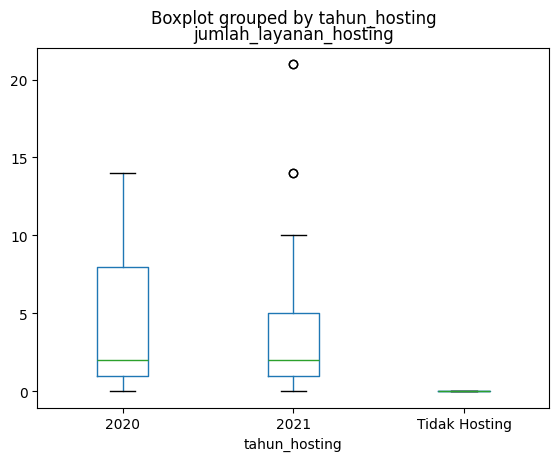

In [19]:
dataMerge.boxplot(by ='tahun_hosting', column =['jumlah_layanan_hosting'], grid = False)

<Axes: title={'center': 'jumlah_aplikasi'}, xlabel='tahun_aplikasi'>

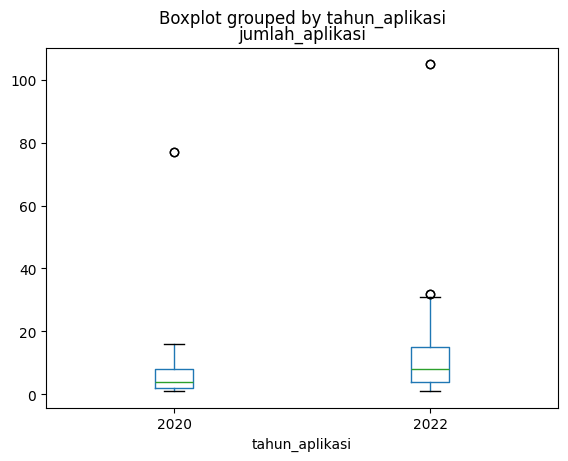

In [20]:
dataMerge.boxplot(by ='tahun_aplikasi', column =['jumlah_aplikasi'], grid = False)

C:\Users\muhar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\muhar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\muhar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

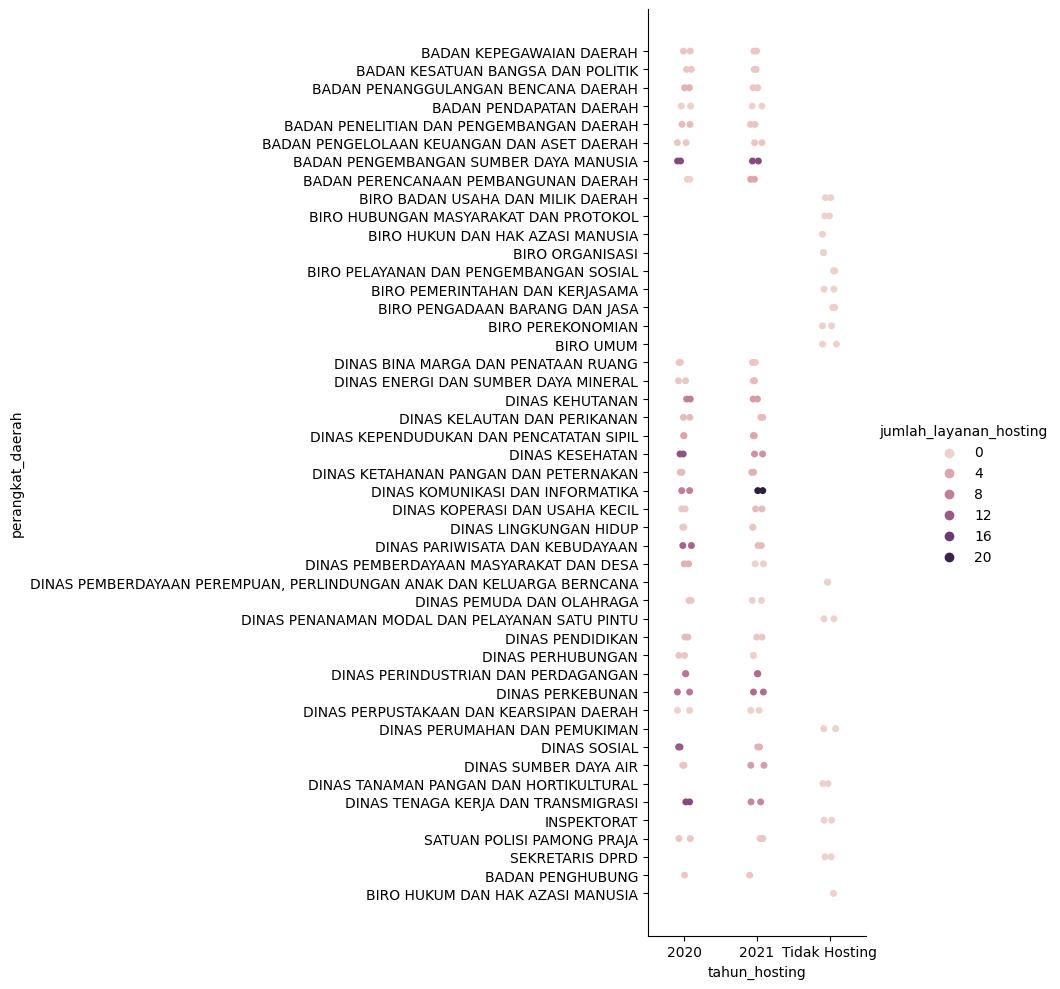

In [21]:
sns.catplot(x="tahun_hosting", y="perangkat_daerah", hue="jumlah_layanan_hosting", data=dataMerge, height=10)